In [3]:
!pip3 install matplotlib

You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.


In [4]:
!pip3 install beautifulsoup4

     |████████████████████████████████| 109 kB 746 kB/s eta 0:00:01
You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.


In [5]:
!pip3 install scikit-learn

     |████████████████████████████████| 7.1 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 954 kB/s eta 0:00:01
You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.


In [10]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime(2016,12,31)

df = web.DataReader('TSLA', 'yahoo', start, end)
print(df.tail(6))
print(df.head(6))

                  High         Low        Open       Close   Volume  \
Date                                                                  
2016-12-22  209.990005  206.500000  208.220001  208.449997  3111100   
2016-12-23  213.449997  207.710007  208.000000  213.339996  4670500   
2016-12-27  222.250000  214.419998  214.880005  219.529999  5915700   
2016-12-28  223.800003  217.199997  221.529999  219.740005  3782500   
2016-12-29  219.199997  214.119995  218.559998  214.679993  4045000   
2016-12-30  217.500000  211.679993  216.300003  213.690002  4642600   

             Adj Close  
Date                    
2016-12-22  208.449997  
2016-12-23  213.339996  
2016-12-27  219.529999  
2016-12-28  219.740005  
2016-12-29  214.679993  
2016-12-30  213.690002  
                 High        Low       Open      Close    Volume  Adj Close
Date                                                                       
2010-06-29  25.000000  17.540001  19.000000  23.889999  18766300  23.889999
201

/usr/local/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


             High        Low       Open      Close    Volume  Adj Close  \
Date                                                                      
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999   
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000   
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999   
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001   
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001   

                100ma  
Date                   
2010-06-29  23.889999  
2010-06-30  23.860000  
2010-07-01  23.226666  
2010-07-02  22.220000  
2010-07-06  20.998000  


<BarContainer object of 1640 artists>

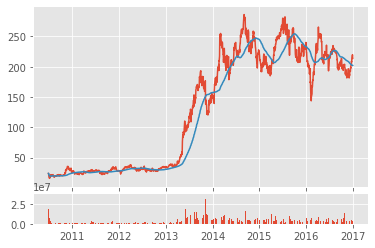

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

#start = dt.datetime(2000,1,1)
#end = dt.datetime(2016,12,31)

#df = web.DataReader('TSLA', 'yahoo', start, end)
#print(df.tail(6))
#df.to_csv('tsla.csv')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

#print(df.head())

#print(df[['Open','High']].head())
#df['Adj Close'].plot()


#ma = moving average

df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()

#df.dropna(inplace=True)
print(df.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex = ax1)
ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])



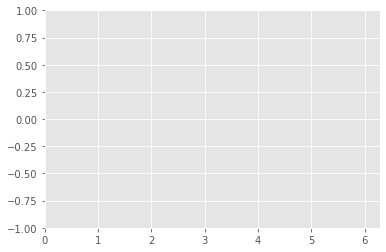

In [4]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

from IPython.display import HTML
HTML(ani.to_jshtml())

In [10]:
!pip3 install --upgrade mplfinance

You should consider upgrading via the '/usr/local/opt/python/bin/python3.7 -m pip install --upgrade pip' command.


In [13]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates 
import pandas as pd
import pandas_datareader.data as web

style.use('ggplot')

#start = dt.datetime(2000,1,1)
#end = dt.datetime(2016,12,31)

#df = web.DataReader('TSLA', 'yahoo', start, end)
#print(df.tail(6))
#df.to_csv('tsla.csv')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

#print(df.head())

#print(df[['Open','High']].head())
#df['Adj Close'].plot()


#ma = moving average

#df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df_ohlc = df['Adj Close'].resample('10D').ohlc()

df_volume = df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)
print(df_ohlc.head())


        Date       open       high        low      close
0 2010-06-29  23.889999  23.889999  15.800000  17.459999
1 2010-07-09  17.400000  20.639999  17.049999  20.639999
2 2010-07-19  21.910000  21.910000  20.219999  20.719999
3 2010-07-29  20.350000  21.950001  19.590000  19.590000
4 2010-08-08  19.600000  19.600000  17.600000  19.150000
